In [1]:
from utils.general_utils import *
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from utils.plot_utils import *
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [2]:
df = pd.read_csv('data/marvel_demo_stats_powers.csv')
df = df.replace('-', 'no_value')

In [3]:
# Create a class out of the alignment column (is good or evil)
df['class'] = df['Alignment_x'].apply(lambda x: True if x == 'good' else False)
df['is_human'] = df['Race'].apply(lambda x: True if 'Human' in x else False)
df['is_mutant'] = df['Race'].apply(lambda x: True if 'Mutant' in x else False)
df.drop(['Unnamed: 0', 'ID', 'Name', 'Alignment_x', 'Publisher'], axis=1, inplace=True)
cols = list(df.columns)
cat_cols = ['Gender', 'EyeColor', 'Race', 'HairColor', 'SkinColor']
int_cols = ['Height', 'Weight', 'Intelligence_x', 'Strength', 'Stamina', 'Speed', 'Durability_x', 'Power', 'Combat', 'Total']
bool_cols = [x for x in cols if (x not in cat_cols and x not in int_cols)]
df[cat_cols] = df[cat_cols].fillna(value='no_value')
df[int_cols] = df[int_cols].fillna(value=0)
df[bool_cols] = df[bool_cols].fillna(value=False)
top_50_features = ['Gender', 'HairColor', 'Race', 'Super Strength', 'EyeColor', 'Stealth', 'Durability_x',
                   'Strength',
                   'Height',
                   'Weight',
                   'Combat',
                   'Total',
                   'Enhanced Senses',
                   'Flight',
                   'Energy Blasts',
                   'Speed',
                   'Stamina',
                   'Energy Absorption',
                   'Power',
                   'Shapeshifting',
                   'Accelerated Healing',
                   'Force Fields',
                   'Psionic Powers',
                   'Weapon-based Powers',
                   'Intelligence_x',
                   'Energy Manipulation',
                   'Reflexes',
                   'Molecular Manipulation',
                   'Durability_y',
                   'Fire Resistance',
                   'is_human',
                   'is_mutant',
                   'Agility',
                   'Longevity',
                   'Super Speed']
len(top_50_features)

35

In [4]:
# cast int cols to int type
for col in int_cols:
    df[col] = df[col].astype(int)
# for col in bool_cols:
#     df[col] = df[col].astype(bool)

In [5]:
df = df.reset_index()
X, y = df.drop(['index', 'class'], axis=1), df['class']
X = X.loc[:, top_50_features]

In [6]:
# Model init
cbc = CatBoostClassifier(cat_features=get_cat_feature_names(X), auto_class_weights='Balanced', random_state=5,
                         bootstrap_type='Bayesian', rsm=0.1)
evaluation = Evaluation()

Learning rate set to 0.006524
0:	learn: 0.6919655	total: 53.1ms	remaining: 53.1s
1:	learn: 0.6909045	total: 55.2ms	remaining: 27.6s
2:	learn: 0.6901708	total: 57.1ms	remaining: 19s
3:	learn: 0.6901265	total: 57.8ms	remaining: 14.4s
4:	learn: 0.6890561	total: 59.5ms	remaining: 11.8s
5:	learn: 0.6881303	total: 61.3ms	remaining: 10.2s
6:	learn: 0.6871499	total: 62.9ms	remaining: 8.93s
7:	learn: 0.6862083	total: 64.5ms	remaining: 8s
8:	learn: 0.6850925	total: 66.1ms	remaining: 7.28s
9:	learn: 0.6839259	total: 67.3ms	remaining: 6.66s
10:	learn: 0.6822526	total: 69ms	remaining: 6.21s
11:	learn: 0.6811130	total: 70.6ms	remaining: 5.81s
12:	learn: 0.6799952	total: 72.7ms	remaining: 5.52s
13:	learn: 0.6788299	total: 75.1ms	remaining: 5.29s
14:	learn: 0.6780263	total: 77.1ms	remaining: 5.06s
15:	learn: 0.6768099	total: 78.9ms	remaining: 4.85s
16:	learn: 0.6763658	total: 79.9ms	remaining: 4.62s
17:	learn: 0.6753591	total: 81.6ms	remaining: 4.45s
18:	learn: 0.6737981	total: 83.5ms	remaining: 4.31s

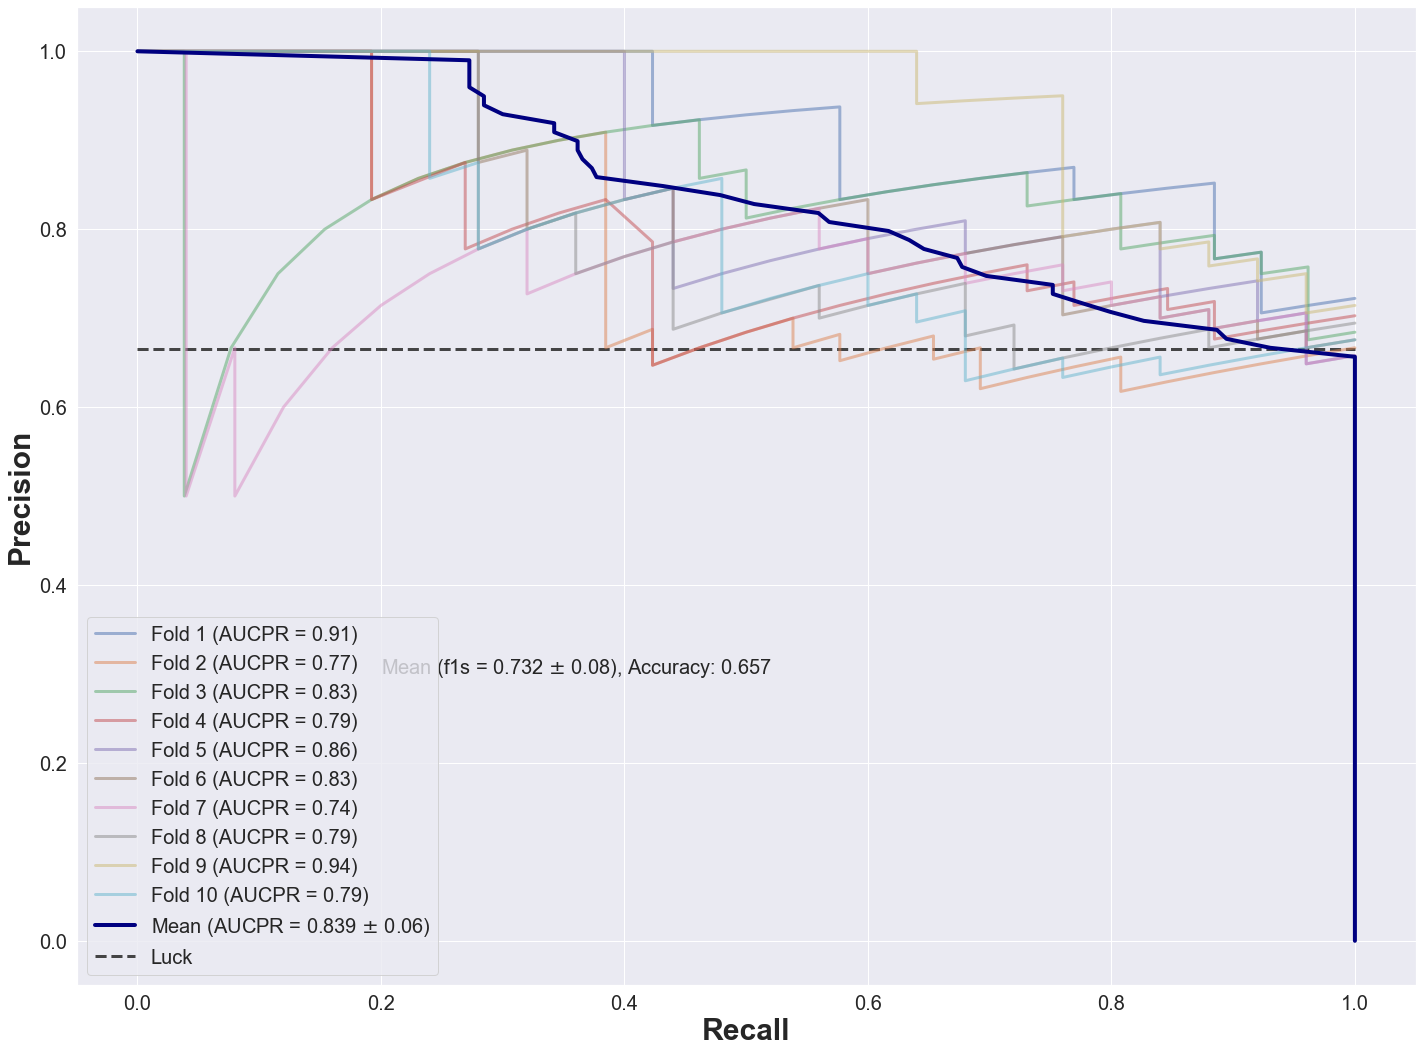

In [7]:
feature_importance = evaluation.plot_cv_precision_recall(cbc, n_folds=10, n_repeats=1, X=X, y=y, random_state=0)

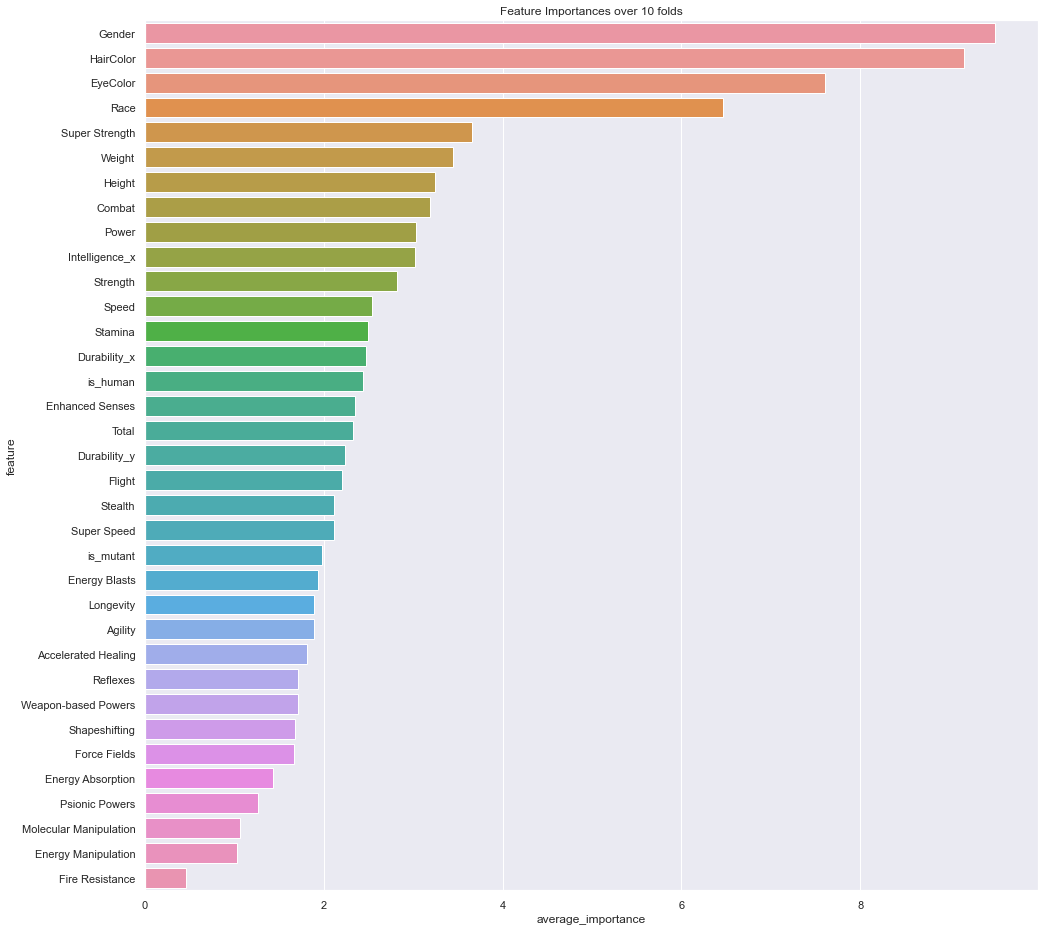

In [8]:
evaluation.plot_feature_importance(feature_importance, n_features_to_show=50)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
cbc.fit(X_train, y_train)
explainer = ClassifierExplainer(cbc, X_test, y_test)
ExplainerDashboard(explainer, simple=True).run()

Learning rate set to 0.00549
0:	learn: 0.6919222	total: 1.57ms	remaining: 1.57s
1:	learn: 0.6908627	total: 3.69ms	remaining: 1.84s
2:	learn: 0.6899559	total: 6.11ms	remaining: 2.03s
3:	learn: 0.6894470	total: 8.56ms	remaining: 2.13s
4:	learn: 0.6891150	total: 10ms	remaining: 1.99s
5:	learn: 0.6882853	total: 12.1ms	remaining: 2.01s
6:	learn: 0.6877430	total: 13.2ms	remaining: 1.86s
7:	learn: 0.6867369	total: 14.3ms	remaining: 1.77s
8:	learn: 0.6859130	total: 15.9ms	remaining: 1.75s
9:	learn: 0.6851049	total: 17.1ms	remaining: 1.69s
10:	learn: 0.6842447	total: 18.3ms	remaining: 1.65s
11:	learn: 0.6836095	total: 20.1ms	remaining: 1.65s
12:	learn: 0.6825532	total: 21.8ms	remaining: 1.66s
13:	learn: 0.6824786	total: 22.6ms	remaining: 1.59s
14:	learn: 0.6822974	total: 24.2ms	remaining: 1.59s
15:	learn: 0.6813368	total: 26.3ms	remaining: 1.62s
16:	learn: 0.6805045	total: 28.2ms	remaining: 1.63s
17:	learn: 0.6795314	total: 30.5ms	remaining: 1.66s
18:	learn: 0.6784268	total: 33ms	remaining: 1.7

 * Running on all addresses.
 * Running on http://100.64.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [30/May/2021 01:11:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2021 01:11:13] "GET /assets/bootstrap.min.css?m=1622205120.162684 HTTP/1.1" 304 -
127.0.0.1 - - [30/May/2021 01:11:13] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2021 01:11:13] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2021 01:11:13] "GET /assets/favicon.ico?m=1622205120.1630576 HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2021 01:11:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2021 01:11:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2021 01:11:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2021 01:11:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2021 01:11:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2021 01:11:13] "POST /_dash-update-component HTTP/1.1" 200 -